In [19]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [20]:
path_to_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

col_names = [
    'age', 'workclass', 'fnlwgt','education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain','capital-loss',
    'hours-per-week','native-country', 'income'
]

df = pd.read_csv(path_to_data, header=None, names = col_names)
print(df.head())

#Clean columns by stripping extra whitespace for columns of type "object"
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].str.strip()


   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

In [21]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [22]:
target_column = "income"
raw_feature_cols = [
    'age',
    'education-num',
    'workclass',
    'hours-per-week',
    'sex',
    'race'
]

In [23]:
#1. Percentage of samples with income < and > 50k
df[target_column].value_counts(normalize=True)


income
<=50K    0.75919
>50K     0.24081
Name: proportion, dtype: float64

In [24]:
#2. Data types of features
df[raw_feature_cols].dtypes

age                int64
education-num      int64
workclass         object
hours-per-week     int64
sex               object
race              object
dtype: object

In [25]:
#3. Preparing the features
X = pd.get_dummies(df[raw_feature_cols], drop_first=True)
print(X.head(n=5))

   age  education-num  hours-per-week  workclass_Federal-gov  \
0   39             13              40                  False   
1   50             13              13                  False   
2   38              9              40                  False   
3   53              7              40                  False   
4   28             13              40                  False   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0                False                   False              False   
1                False                   False              False   
2                False                   False               True   
3                False                   False               True   
4                False                   False               True   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  workclass_State-gov  \
0                   False                       False                 True   
1                   False                   

In [26]:
##4. Convert target variable to binary
y = pd.get_dummies(df['income'], drop_first=True)
print(y.head(10))

    >50K
0  False
1  False
2  False
3  False
4  False
5  False
6  False
7   True
8   True
9   True


In [36]:
print(X.shape)
print(y.shape)

(32561, 16)
(32561, 1)


In [27]:
#df_2 = pd.concat([X, y])
#df_2

,age,education-num,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,sex_Male,race_Asian-Pac-Islander,race_Black,race_Other,race_White,>50K
0,39.0,13.0,40.0,False,False,False,False,False,False,True,False,True,False,False,False,True,NaN
1,50.0,13.0,13.0,False,False,False,False,False,True,False,False,True,False,False,False,True,NaN
2,38.0,9.0,40.0,False,False,False,True,False,False,False,False,True,False,False,False,True,NaN
3,53.0,7.0,40.0,False,False,False,True,False,False,False,False,True,False,True,False,False,NaN
4,28.0,13.0,40.0,False,False,False,True,False,False,False,False,False,False,True,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
32557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
32558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
32559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [28]:
##5a. Create train-est split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##5b. Create base estimator and store it as decision_stump
decision_stump = DecisionTreeClassifier(max_depth=1)

In [29]:
##6. Create AdaBoost Classifier
ada_classifier = AdaBoostClassifier(base_estimator=decision_stump)

In [30]:
##7. Create GradientBoost Classifier
grad_classifier = GradientBoostingClassifier()

In [31]:
##8a.Fit models and get predictions
ada_classifier.fit(X_train, y_train)
y_pred_ada = ada_classifier.predict(X_test)
print(y_pred_ada)

grad_classifier.fit(X_train, y_train)
y_pred_grad = grad_classifier.predict(X_test)
print(y_pred_grad)

##8b. Print accuracy and F1
print(accuracy_score(y_test, y_pred_ada))
print(accuracy_score(y_test, y_pred_grad))


d:\Users\Giorgio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Users\Giorgio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[False False False ... False False  True]


d:\Users\Giorgio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False ... False False  True]
0.8093970723717883
0.8145153035111066


In [32]:
##9. Hyperparameter Tuning
n_estimators_list = [10, 30, 50, 70, 90]
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': n_estimators_list}

clf = GridSearchCV(estimator=ada_classifier, param_grid=param_grid, cv=10)
clf.fit(X_train, y_train)

d:\Users\Giorgio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Users\Giorgio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
d:\Users\Giorgio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Users\Giorgio\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)),
             param_grid={'n_estimators': [10, 30, 50, 70, 90]})

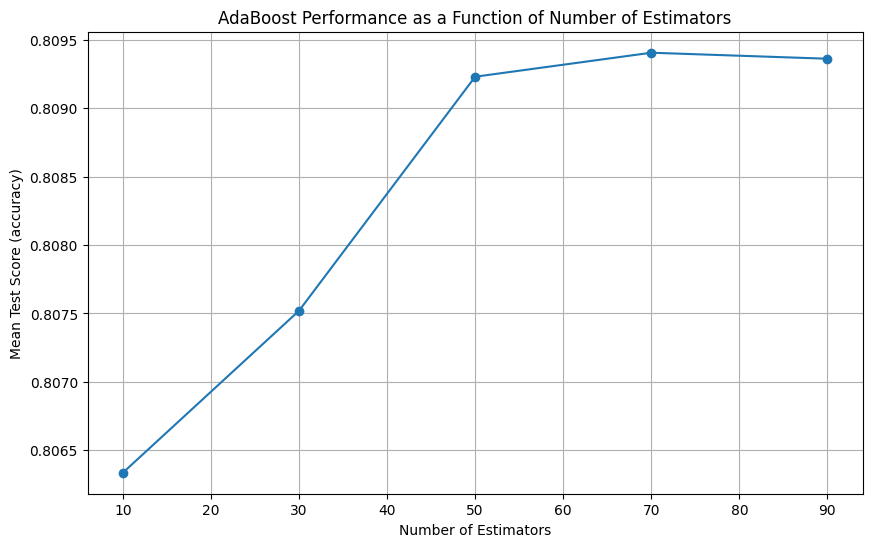

Best number of estimators: 70


In [33]:
##10. Plot mean test scores
ada_scores_list = clf.cv_results_['mean_test_score']

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, ada_scores_list, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score (accuracy)')
plt.title('AdaBoost Performance as a Function of Number of Estimators')
plt.grid(True)
plt.show()

# Find the number of estimators that gives the best accuracy
best_n_estimators = n_estimators_list[ada_scores_list.argmax()]
print(f"Best number of estimators: {best_n_estimators}")